In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import plotnine
from matplotlib import cm, colormaps
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib

from plotnine import *

# get param set
paramsets =  pd.read_csv('../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets.drop('theta',inplace=True, axis=1)

df = pd.read_pickle("./cyl10to11_pdecsa.pkl")  
viridis = matplotlib.colormaps.get_cmap('viridis')

In [13]:

def bin_(dataframe, independent_variable, dependent_variable, num_bins,doLog):
    # Step 1: Define the range of each bin for the independent variable
    #bin_ranges = pd.cut(dataframe[independent_variable], bins=num_bins, include_lowest=True)
    
    #hist, bin_vales = np.histogram(dataframe[independent_variable], bins=num_bins)
    bin_vales = np.linspace(-25,0,num_bins)
    bin_ranges = pd.cut(dataframe[independent_variable], bins=bin_vales)#, include_lowest=True)
    # Step 2: Group the dataframe according to the bin ranges
    grouped = dataframe.groupby(bin_ranges)

    # Step 3: Compute the sum of dependent variable for each bin and the mean of the independent variable
    bin_meansZ = grouped[independent_variable].mean()#bin_vales[:-1]+np.diff(bin_vales)# 
    bin_meansX = grouped[dependent_variable].mean()
    return bin_meansZ.dropna(), bin_meansX.dropna()

def bin_and_plot(dataframe, independent_variable, dependent_variable, num_bins,doLog=True, colVar = None):
    if colVar is not None:
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed

    # Loop to plot each line
    for i in range(99):
        df_ = dataframe[dataframe['pSet']==i]
        bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, num_bins,doLog)
        #print('bin_means',bin_meansZ, 'bin_sums',bin_meansX)
        if colVar is None:
            plt.plot( bin_meansX.values, bin_meansZ,label=f'Line {i+1}')
        else:
            ourVal = df_[colVar].mean()
            normVal = (ourVal - minV)/(maxV - minV)
            plt.plot( bin_meansX.values, bin_meansZ,label=f'Line {i+1}',c=viridis(normVal))
            
        
    plt.ylabel('Mean ' + independent_variable+" (mol/cm3))")
    plt.xlabel('Mean ' + dependent_variable)
    if doLog:
        plt.yscale('log')
    if colVar is not None:
        plt.title(colVar)
    plt.grid(True)
    plt.show()


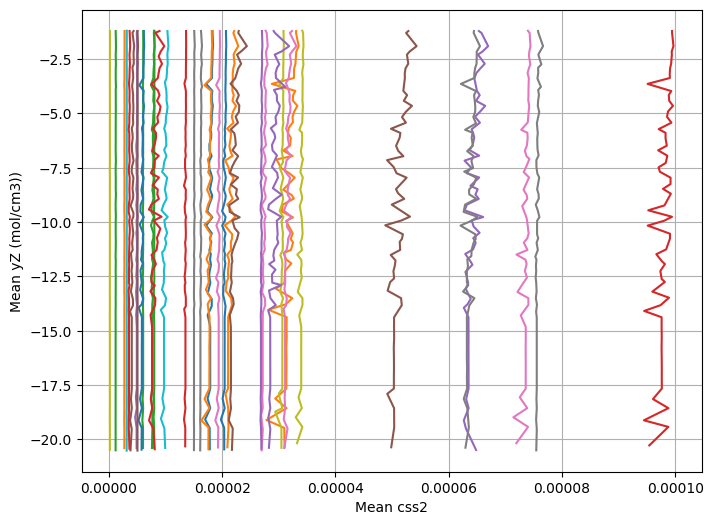

In [21]:
bin_and_plot(df, 'yZ', 'css2', 100,doLog=False)

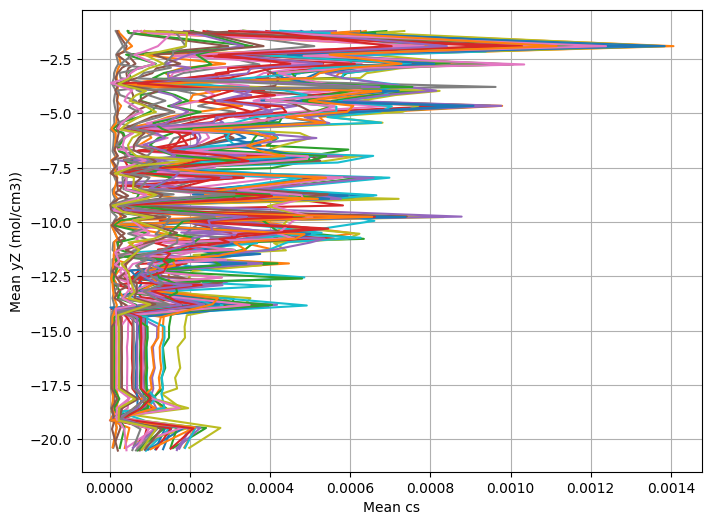

In [16]:
bin_and_plot(df, 'yZ', 'cs', 100,doLog=False)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'cs', 100,doLog=False, colVar=nn)

In [ ]:
bin_and_plot(df, 'yZ', 'cl', 100,doLog=False)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'cl', 100,doLog=False, colVar=nn)

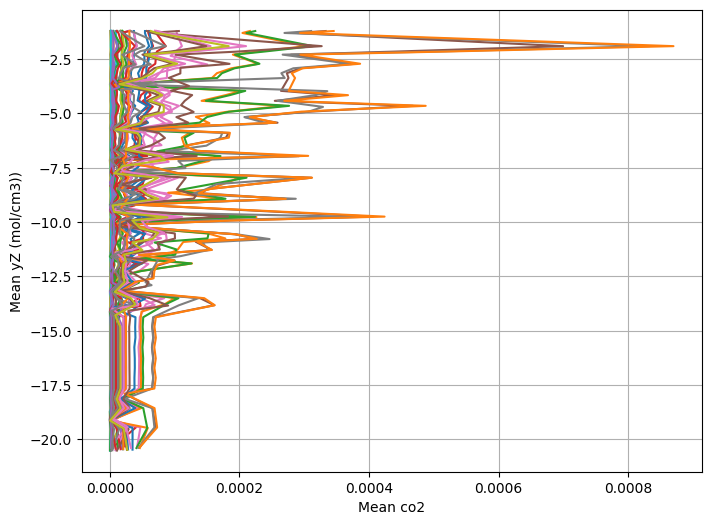

In [17]:
bin_and_plot(df, 'yZ', 'co2', 100,doLog=False)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'co2', 100,doLog=False, colVar=nn)

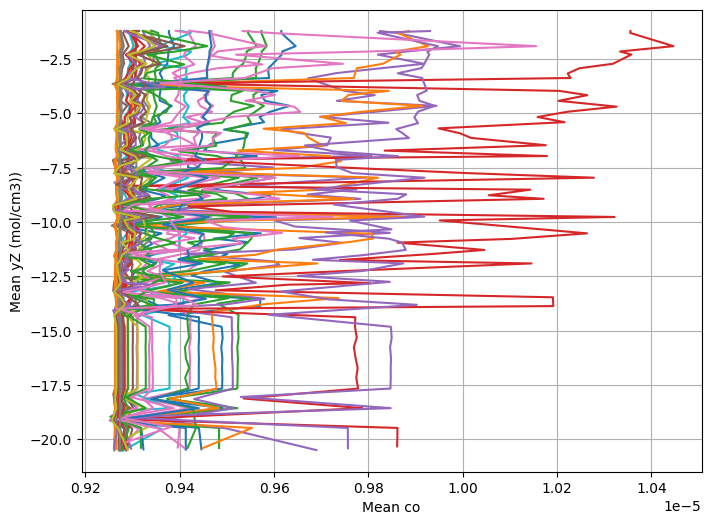

In [19]:
bin_and_plot(df, 'yZ', 'co', 100,doLog=False)

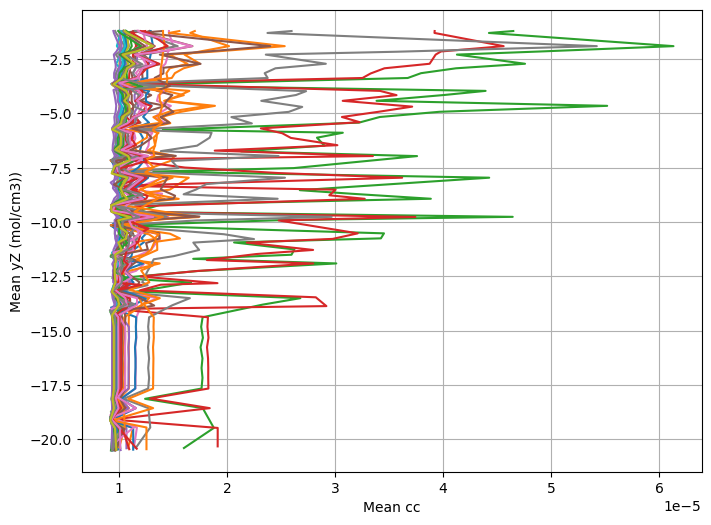

In [18]:
bin_and_plot(df, 'yZ', 'cc', 100,doLog=False)

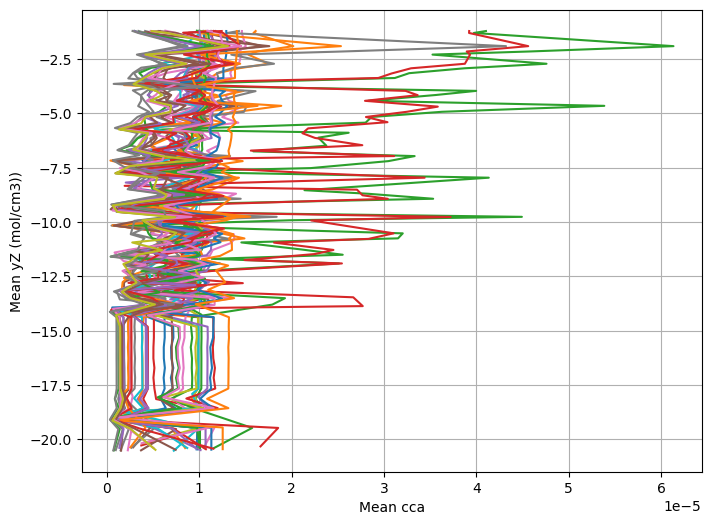

In [20]:
bin_and_plot(df, 'yZ', 'cca', 100,doLog=False)

In [ ]:
bin_and_plot(df, 'yZ', 'ccd', 100,doLog=False)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'ccd', 100,doLog=False, colVar=nn)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'cca', 100,doLog=False, colVar=nn)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'cc', 100,doLog=False, colVar=nn)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'cod', 100,doLog=False, colVar=nn)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'coa', 100,doLog=False, colVar=nn)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'co', 100,doLog=False, colVar=nn)

In [ ]:
nn = "k_r,O"
bin_and_plot(df, 'yZ', 'co', 100,doLog=False, colVar=nn)
bin_and_plot(df, 'yZ', 'cod', 100,doLog=False, colVar=nn)
bin_and_plot(df, 'yZ', 'coa', 100,doLog=False, colVar=nn)

In [ ]:
nn = "k_d,O"
bin_and_plot(df, 'yZ', 'co', 100,doLog=False, colVar=nn)
bin_and_plot(df, 'yZ', 'cod', 100,doLog=False, colVar=nn)
bin_and_plot(df, 'yZ', 'coa', 100,doLog=False, colVar=nn)

In [ ]:
bin_and_plot(df, 'yZ', 'coa', 100,doLog=False)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'coa', 100,doLog=False, colVar=nn)

In [ ]:
bin_and_plot(df, 'yZ', 'cod', 100,doLog=False)

In [ ]:
for nn in paramsets.columns.tolist():
    bin_and_plot(df, 'yZ', 'cod', 100,doLog=False, colVar=nn)

In [ ]:
plt.scatter(df['yX'],df['yZ'] , #np.log(df['cc']),np.log(df['co']), 
            c= np.log(df['cs']),#s=df['cs'],
            alpha=0.3, edgecolors ='none')
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title()
plt.colorbar()
plt.xlabel('cs')
plt.ylabel('co +cc')
plt.show()

In [ ]:
plt.scatter(df['cs'],df['yZ'] , #np.log(df['cc']),np.log(df['co']), 
            c= (df['pSet']),#s=df['cs'],
            alpha=0.2, edgecolors ='none', marker ='x')
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title()
plt.colorbar()
plt.xlabel('cs')
plt.ylabel('co +cc')
plt.show()

In [ ]:
mStyles = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]

In [ ]:
def bin_and_plot(dataframe, independent_variable, dependent_variable, num_bins,nrows,
                 ncols, indexsubplot,doLog=True, colVar = None):
    if colVar is not None:
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed

    # Loop to plot each line
    for i in range(99):
        df_ = dataframe[dataframe['pSet']==i]
        bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, num_bins,doLog)
        #print('bin_means',bin_meansZ, 'bin_sums',bin_meansX)
        if colVar is None:
            plt.plot( bin_meansX.values, bin_meansZ,label=f'Line {i+1}')
        else:
            ourVal = df_[colVar].mean()
            normVal = (ourVal - minV)/(maxV - minV)
            plt.plot( bin_meansX.values, bin_meansZ,label=f'Line {i+1}',c=viridis(normVal))
            
        
    plt.ylabel('Mean ' + independent_variable+" (mol/cm3))")
    plt.xlabel('Mean ' + dependent_variable)
    if doLog:
        plt.yscale('log')
    if colVar is not None:
        plt.title(colVar)
    plt.grid(True)
    plt.show()
